# Task 1

## Task 1.1

In [1]:
import numpy as np
from CartPole import *
from sklearn import linear_model
import time

In [2]:
    def start_the_cart(initial_values1, initial_values2=None, initial_values3=None, steps=10, remap_angle=False, visual=False, display_plots=True, variable = None):

        cp = CartPole(visual=visual)
        cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values1
        
        

        for step in range(steps):
            if visual: 
                cp.drawPlot()
            cp.performAction()
            if remap_angle: 
                cp.remap_angle()
            inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
            try: 
                x_history = np.vstack((x_history, np.array(inter)))
            except:
                x_history = np.vstack((np.array(initial_values1),np.array(inter)))
        

        
        x_axis=range(len(x_history))
        
        if initial_values2:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values2
        
           

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    y_history = np.vstack((y_history, np.array(inter)))
                except:
                    y_history = np.vstack((np.array(initial_values2),np.array(inter)))
        
        if initial_values3:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values3
        
            

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    z_history = np.vstack((z_history, np.array(inter)))
                except:
                    z_history = np.vstack((np.array(initial_values3),np.array(inter)))
        
        if display_plots:
            fig, axs = plt.subplots(2, 2, figsize=(10, 7))

            axs[0,0].plot(x_axis, [x[0] for x in x_history],label='First')
            if initial_values2: axs[0,0].plot(x_axis, [x[0] for x in y_history],label='Second')
            if initial_values3: axs[0,0].plot(x_axis, [x[0] for x in z_history],label='Third')

            axs[0,1].plot(x_axis, [x[1] for x in x_history])
            if initial_values2: axs[0,1].plot(x_axis, [x[1] for x in y_history])
            if initial_values3: axs[0,1].plot(x_axis, [x[1] for x in z_history])
           
            axs[1,0].plot(x_axis, [x[2] for x in x_history])
            if initial_values2: axs[1,0].plot(x_axis, [x[2] for x in y_history])
            if initial_values3: axs[1,0].plot(x_axis, [x[2] for x in z_history])
            
            axs[1,1].plot(x_axis, [x[3] for x in x_history])
            if initial_values2: axs[1,1].plot(x_axis, [x[3] for x in y_history])
            if initial_values3: axs[1,1].plot(x_axis, [x[3] for x in z_history])
            
            #Set titles
            axs[0,0].set_title('Cart location')
            axs[0,0].set_xlabel('Steps')
            axs[0,0].set_ylabel('x')

            axs[0,1].set_title('Cart velocity')
            axs[0,1].set_xlabel('Steps')
            axs[0,1].set_ylabel('x_dot')


            axs[1,0].set_title('Pole angle')
            axs[1,0].set_xlabel('Steps')
            axs[1,0].set_ylabel('theta')

            axs[1,1].set_title('Pole velocity')
            axs[1,1].set_xlabel('Steps')
            axs[1,1].set_ylabel('theta_dot')

            if variable: fig.suptitle(('Effect of different initial {} on cart dynamics').format(variable),fontsize=16)

            fig.legend()
            fig.tight_layout()
        
        
        return x_history[-1]

### Stable equilibrium

In [3]:
#history = start_the_cart([0,0,np.pi,1],[0,0,np.pi,5],[0,0,np.pi,10],visual=False,remap_angle=False,variable = 'Pole Velocity')


### Complete rotation of pendulum

In [4]:
#history = start_the_cart([0,0,np.pi,15],visual=False,remap_angle=False)

## Task 1.2

In [5]:
initialize = np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
#print(initialize)

In [6]:
variable_number={0:'Cart location',1:'Cart velocity',2:'Pole angle',3:'Pole velocity'}

In [7]:
def one_step(variable, x_axis_range, x_axis_intervals):
    
    
    
    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        y = start_the_cart(x, steps=steps, display_plots=False)

        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
   
    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

### Vary cart location


In [8]:
#one_step(0,[-5,5],15)

### Vary cart velocity

In [9]:
#one_step(1,[-10,10],15)

### Vary pole angle

In [10]:
#one_step(2,[-np.pi,np.pi],15)

### Vary pole velocity

In [11]:
#one_step(3,[-15,15],15)

### Creating a variable "y", the difference between x

In [12]:
def one_step_difference(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False)
        y = x_t-x
        
        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)
   

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location change')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity change')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle change')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity change')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

    return final_y

In [13]:
def one_step_difference_2(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False,remap_angle=True)
        y = x_t-x
        
        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)


    return x_axis, final_y

In [14]:
def together_plot_1_2():
    x_axis1, c_l_real = one_step_difference_2(0,[-5,5],15)
    x_axis2,c_v_real = one_step_difference_2(1,[-10,10],15)
    x_axis3,p_a_real = one_step_difference_2(2,[-np.pi,np.pi],15)
    x_axis4,p_v_real = one_step_difference_2(3,[-15,15],15)

    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    for i in range(4):
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_real],label='{}'.format(variable_number[i]))
    
        
        
        
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_real],label='Real c_v')
  

        axs[1,0].plot(x_axis3, [y[i] for y in p_a_real],label='Real p_a')
     
        
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_real],label='Real p_v')
  

        
        axs[0,0].legend()


    axs[0,0].set_xlabel('Initial value of cart location')
    axs[0,0].set_ylabel('Cart dynamics changes')

    axs[0,1].set_xlabel('Initial value of cart velocity')
    axs[0,1].set_ylabel('Cart dynamics changes')

    axs[1,0].set_xlabel('Initial value of pole angle')
    axs[1,0].set_ylabel('Cart dynamics changes')

    axs[1,1].set_xlabel('Initial value of pole velocity')
    axs[1,1].set_ylabel('Cart dynamics changes')

    fig.tight_layout()
        
    plt.show()

### (i) Scans of single relationships

In [15]:
#together_plot_1_2()

### (ii) Contour plots

In [16]:
different_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
axes_ranges = {0 : np.linspace(-5,5,10), 1 : np.linspace(-10,10,10), 2 : np.linspace(-np.pi,np.pi,10), 3 : np.linspace(-15,15,10)}

def axes_for_pairs(index_pair):
    range_of_variables = []
    for index in index_pair:
        range_of_variables.append(axes_ranges[index])
    return range_of_variables

def contours_of_pairs(index_pair, range_of_variables):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_of_variables
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = initialize.copy()
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(start_the_cart(x, steps=1, display_plots=False))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

In [17]:
"""
for indices in different_pairs:
     print('Plots of {} and {}'.format(variable_number[indices[0]],variable_number[indices[1]]))
     contours_of_pairs(indices, axes_for_pairs(indices))
     plt.show()
"""  

"\nfor indices in different_pairs:\n     print('Plots of {} and {}'.format(variable_number[indices[0]],variable_number[indices[1]]))\n     contours_of_pairs(indices, axes_for_pairs(indices))\n     plt.show()\n"

## Task 1.3

In [18]:
def get_xy_pairs(n):
    
    for iteration in range(n):
        random_point= np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
        y = start_the_cart(random_point,steps=1, remap_angle=True,display_plots=False)
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_x = np.vstack((final_x, np.array(random_point)))
        except:
            final_y = np.array(y)
            final_x = np.array(random_point)
        

    return final_x,final_y-final_x

In [19]:
x,y= get_xy_pairs(500)
get_xy_pairs(5)

(array([[  3.29135747,  -4.46634168,   1.43068668,  -7.30383663],
        [ -2.35890331,   5.38932116,   1.70065213,  11.21166958],
        [ -0.68654699,   2.52086144,  -0.0626263 , -13.21482522],
        [ -2.52621639,   6.02727295,   1.27373246,  -0.52715836],
        [  4.17119673,  -7.79944668,   1.02929286,  12.39503203]]),
 array([[-0.84758825,  0.19009747, -0.92180059,  4.99604969],
        [ 1.30395975,  0.41875918, -3.64773096,  0.71067497],
        [ 0.13872175, -4.29663048, -2.99507787, -4.62269231],
        [ 1.19797445,  0.09292736,  0.48783213,  5.83188417],
        [-1.17079564,  2.1378823 , -3.29180329,  2.7538481 ]]))

In [20]:
#Create train and test sets
proportion = 0.95
number_of_samples = 500
cutoff = int(proportion*number_of_samples)
train_x= x[:cutoff]
test_x=x[cutoff:]

train_y=y[:cutoff]
test_y=y[cutoff:]


In [21]:
model = linear_model.LinearRegression()
model.fit(train_x,train_y)
n=model.predict(test_x)

In [22]:
def predict(train_x, test_x, train_y):
    W = np.matmul(np.linalg.pinv(train_x),train_y)
    prediction = np.matmul(test_x,W)
    return prediction,W
    


In [23]:
m,W = predict(train_x, test_x, train_y)


### First plot. Real and predicted plotted against initial

In [24]:
def vertical_plot(input,next_step,pred_next_step):

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in input],[y[0] for y in next_step],label='Real value')
    axs[0,0].scatter([x[0] for x in input],[y[0] for y in pred_next_step],label='Predicted Value')
    axs[0,0].set_xlabel('Cart location initial value')
    axs[0,0].set_ylabel('Cart location final value')
    axs[0,0].legend()

    axs[0,1].scatter([x[1] for x in input],[y[1] for y in next_step])
    axs[0,1].scatter([x[1] for x in input],[y[1] for y in pred_next_step])
    axs[0,1].set_xlabel('Cart velocity initial value')
    axs[0,1].set_ylabel('Cart velocity final value')

    axs[1,0].scatter([x[2] for x in input],[y[2] for y in next_step])
    axs[1,0].scatter([x[2] for x in input],[y[2] for y in pred_next_step])
    axs[1,0].set_xlabel('Pole angle initial value')
    axs[1,0].set_ylabel('Pole angle final value')

    axs[1,1].scatter([x[3] for x in input],[y[3] for y in next_step])
    axs[1,1].scatter([x[3] for x in input],[y[3] for y in pred_next_step])
    axs[1,1].set_xlabel('Pole velocity initial value')
    axs[1,1].set_ylabel('Pole velocity final value')

    fig.suptitle('Predictions vs Real values after 1 step plotted against various initial values')
    fig.tight_layout()

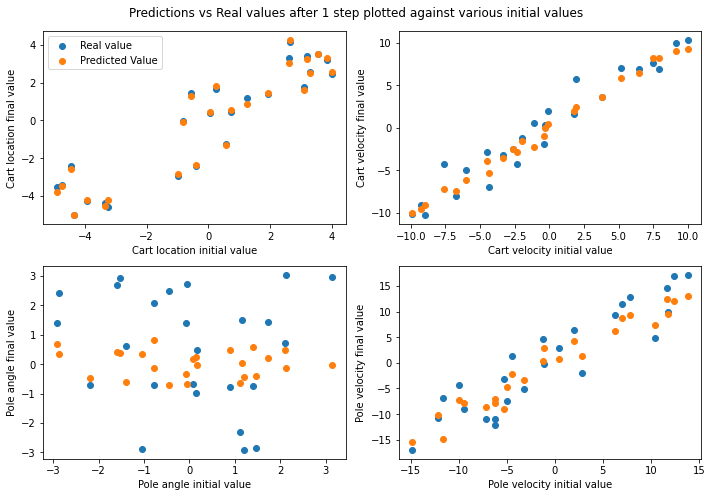

In [25]:
vertical_plot(test_x,test_y+test_x,m+test_x)

In [26]:
def rmse_calc(A,B):
    squared = (A-B)**2
    cl_mse =0
    cv_mse=0
    pa_mse=0
    pv_mse=0
    for row in squared:

        cl_mse+=row[0]
        cv_mse+=row[1]
        pa_mse+=row[2]
        pv_mse+=row[3]
    cl_mse=(cl_mse/len(squared))**0.5
    cv_mse=(cv_mse/len(squared))**0.5
    pa_mse=(pa_mse/len(squared))**0.5
    pv_mse=(pv_mse/len(squared))**0.5


    return np.array([cl_mse,cv_mse,pa_mse,pv_mse])

In [27]:
rmse_calc(test_y,n)

array([0.15448625, 1.35828994, 2.01744197, 3.49943186])

In [28]:
rmse_calc(test_y,m)

array([0.15527881, 1.3590778 , 1.98901686, 3.46074105])

### second plot. This one is real vs predicted only

In [29]:
def real_vs_predicted(real,predicted):
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in real],[y[0] for y in predicted])
   
    axs[0,0].set_xlabel('Cart location real value')
    axs[0,0].set_ylabel('Cart location predicted value')
    

    axs[0,1].scatter([x[1] for x in real],[y[1] for y in predicted])
    axs[0,1].set_xlabel('Cart velocity real value')
    axs[0,1].set_ylabel('Cart velocity predicted value')

    axs[1,0].scatter([x[2] for x in real],[y[2] for y in predicted])
    axs[1,0].set_xlabel('Pole angle real value')
    axs[1,0].set_ylabel('Pole angle predicted value')

    axs[1,1].scatter([x[3] for x in real],[y[3] for y in predicted])
    axs[1,1].set_xlabel('Pole velocity real value')
    axs[1,1].set_ylabel('Pole velocity predicted value')

    fig.suptitle('Predictions vs Real values after 1 step')
    fig.tight_layout()

In [30]:
#real_vs_predicted(test_y+test_x,m+test_x)

### Scans with varying parameters

In [31]:
def one_step_difference_with_predictions_2(variable, x_axis_range, x_axis_intervals):
    x = [-0.24,-9.27,-1.07,9.09]
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1

    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False,remap_angle=True)
        y = x_t-x
        pred = model.predict([x])
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_pred = np.vstack((final_pred,np.array(pred)))
        except:
            final_y = np.array(y)
            final_pred = np.array(pred)



    return x_axis,final_y,final_pred

In [202]:
def together_plot():
    x_axis1, c_l_real,c_l_pred = one_step_difference_with_predictions_2(0,[-5,5],15)
    x_axis2,c_v_real,c_v_pred = one_step_difference_with_predictions_2(1,[-10,10],15)
    x_axis3,p_a_real,p_a_pred = one_step_difference_with_predictions_2(2,[-np.pi,np.pi],15)
    x_axis4,p_v_real,p_v_pred = one_step_difference_with_predictions_2(3,[-15,15],15)

    fig, axs = plt.subplots(2, 2, figsize=(17, 11))
    color = {0:'blue',1:'orange',2:'green',3:'red'}
    for i in range(4):
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_real],label='Real {}'.format(variable_number[i]))
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_pred],color=color[i],linestyle='dashed',label='Predicted {}'.format(variable_number[i]))
        
        
        
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_real],label='Real c_v')
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_pred],label='Predicted c_v',linestyle='dashed',color=color[i])

        axs[1,0].plot(x_axis3, [y[i] for y in p_a_real],label='Real p_a')
        axs[1,0].plot(x_axis3, [y[i] for y in p_a_pred],label='Predicted p_a',linestyle='dashed',color=color[i])
        
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_real],label='Real p_v')
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_pred],label='Predicted p_v',linestyle='dashed',color=color[i])

        
        axs[0,0].legend()


    axs[0,0].set_xlabel('Initial value of cart location')
    axs[0,0].set_ylabel('Cart dynamics changes')

    axs[0,1].set_xlabel('Initial value of cart velocity')
    axs[0,1].set_ylabel('Cart dynamics changes')

    axs[1,0].set_xlabel('Initial value of pole angle')
    axs[1,0].set_ylabel('Cart dynamics changes')

    axs[1,1].set_xlabel('Initial value of pole velocity')
    axs[1,1].set_ylabel('Cart dynamics changes')

    fig.tight_layout()
    
        
    plt.show()

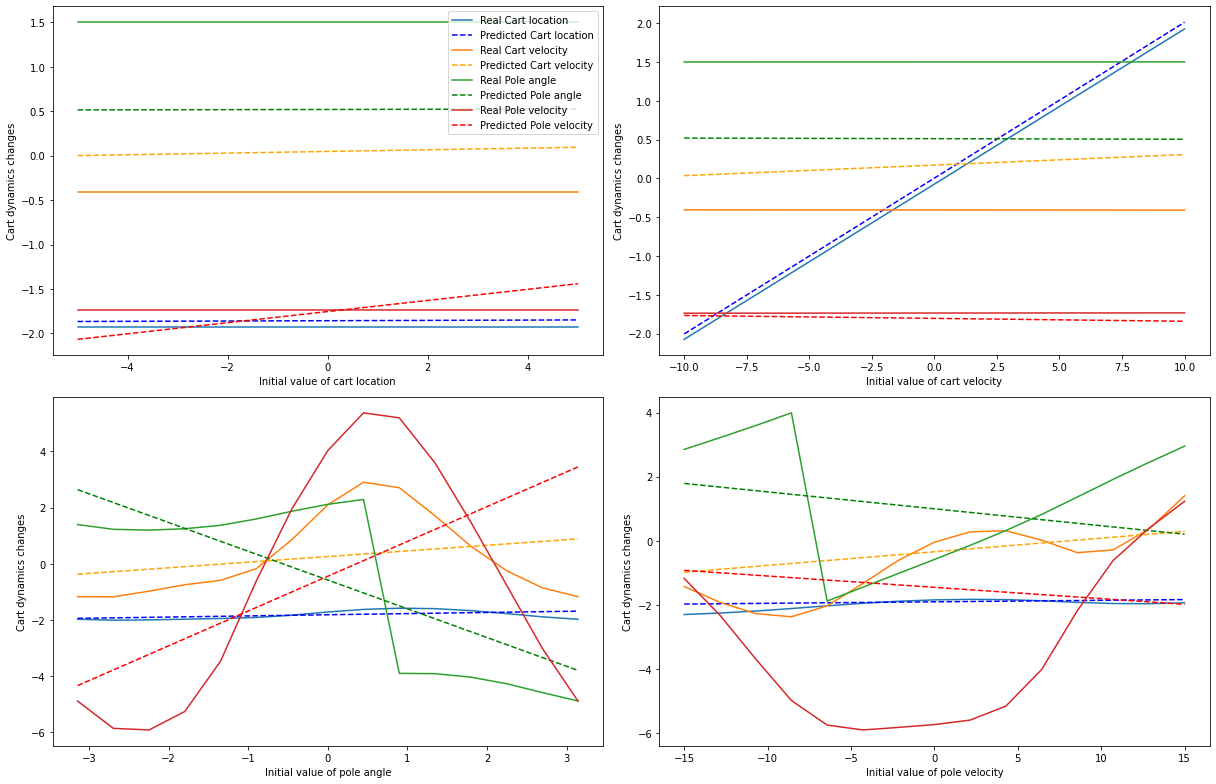

In [203]:
together_plot()


## Task 1.4

In [34]:
def future_predictions_from_predictions(initial_conditions, time_steps,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = np.matmul(final_pred[i],W)
        pred+=final_pred[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from predictions) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

    

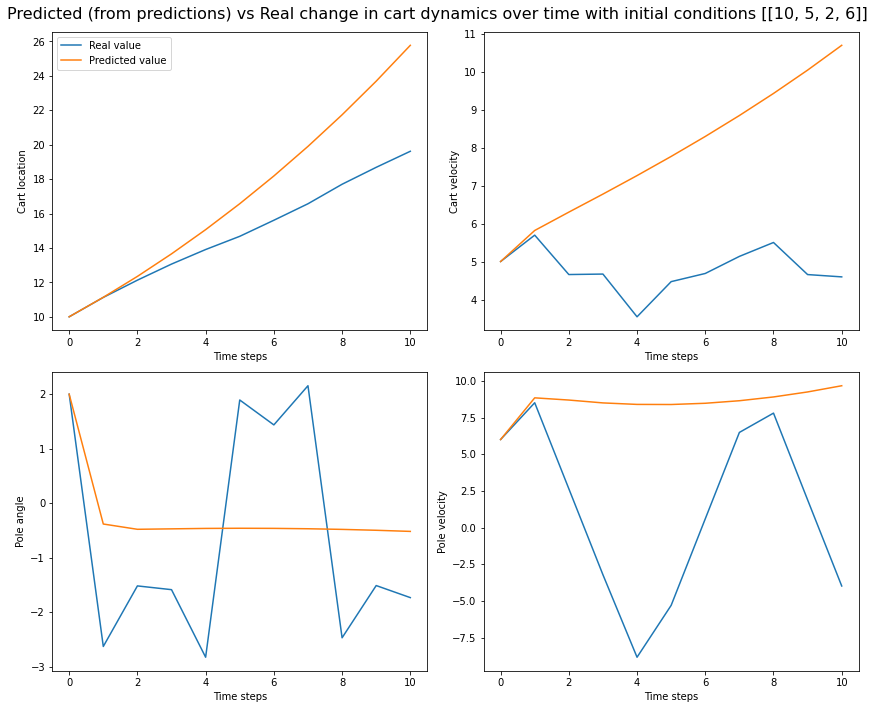

In [35]:
future_predictions_from_predictions([[10,5,2,6]],10,remap_angle=True)

In [36]:
#future_predictions_from_predictions([[0,0,np.pi,15]],10,remap_angle=True)

In [37]:
def future_predictions_from_real(initial_conditions, time_steps,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = np.matmul(final_y[i],W)
        pred+=final_y[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from recent dynamics) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

In [38]:
#future_predictions_from_real([[10,5,2,6]],10,remap_angle=True)


In [39]:
#future_predictions_from_real([[0,0,np.pi,15]],10,remap_angle=True)

### Here I will train the model on non-remapped angle to see the effect

In [40]:
def get_xy_pairs_2(n):
    
    for iteration in range(n):
        random_point= np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
        y = start_the_cart(random_point,steps=1, remap_angle=False,display_plots=False)
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_x = np.vstack((final_x, np.array(random_point)))
        except:
            final_y = np.array(y)
            final_x = np.array(random_point)
        

    return final_x,final_y-final_x

In [41]:
x2,y2= get_xy_pairs_2(500)

In [42]:
#Create train and test sets
proportion = 0.95
number_of_samples = 500
cutoff = int(proportion*number_of_samples)
train_x2= x2[:cutoff]
test_x2=x2[cutoff:]

train_y2=y2[:cutoff]
test_y2=y2[cutoff:]


In [43]:
r,B = predict(train_x2, test_x2, train_y2)

In [44]:
print(B)

[[-2.03492667e-04 -2.16034045e-04 -3.09891379e-03 -2.36021837e-02]
 [ 1.99151583e-01 -4.58173601e-03 -2.79758795e-03 -3.20342337e-02]
 [ 4.06481132e-02  2.14318461e-01  1.56493151e-01  1.15394568e+00]
 [ 2.83388901e-03  2.88083309e-02  1.96572054e-01 -6.04725452e-02]]


In [45]:
np.linalg.eigvals(W)


array([ 0.07200215+0.j        , -0.08181211+0.04010769j,
       -0.08181211-0.04010769j, -0.95163947+0.j        ])

In [46]:
np.linalg.eigvals(B)

array([ 0.53051934,  0.03021041, -0.02769348, -0.4418009 ])

# Task 2

In [154]:
def kernel(x,x_dash,sigma):
    final_power=0
    for i in range(len(x)):
        if i!=2: power1 = (x[i]-x_dash[i])**2
        else: power1 = (np.sin((x[i]-x_dash[i])/2))**2
        power2=power1/(2*(sigma[i])**2)
        final_power+=power2

    K = np.exp(-final_power)
    return K
a = np.array([1,2,3,4])
b=np.array([3,4,5,6])
print(kernel(a,b,[0.1,0.1,0.2,0.2]))

5.291495295000947e-200


### Now we create the K matrix

In [155]:
# Get standard deviation for sigma
sigma = np.array(np.std(x,axis=0))


print(sigma)

[2.91973906 5.8258308  1.81336672 8.65421764]


In [156]:
def kernel_matrix(n,m,data,sigma):
    assert n == len(data),"n is {} and len data is {}".format(n,len(data))
    matrix = np.zeros((n,m))

    #generate indices of m basis centers
    m_indices =[]
    while len(m_indices)<m:
        add = int(np.random.uniform(0,n))
        if add in m_indices:
            continue
        else:
            m_indices.append(add)
    for i in range(n):
        for j in range(m): 
            matrix[i,j] = kernel(data[i],data[m_indices[j]],sigma)
    return matrix, m_indices

In [157]:
n=1500



x,y = get_xy_pairs(n)


In [158]:
#Create train and test sets
proportion = 0.95
number_of_samples = n
cutoff = int(proportion*number_of_samples)
train_x= x[:cutoff]
test_x=x[cutoff:]

train_y=y[:cutoff]
test_y=y[cutoff:]

In [159]:
knm10 = kernel_matrix(len(train_x),10,train_x,sigma)
knm20= kernel_matrix(len(train_x),20,train_x,sigma)
knm40= kernel_matrix(len(train_x),40,train_x,sigma)
knm80= kernel_matrix(len(train_x),80,train_x,sigma)
knm160= kernel_matrix(len(train_x),160,train_x,sigma)
knm320 = kernel_matrix(len(train_x),320,train_x,sigma)
#knm500 = kernel_matrix(len(train_x),500,train_x)

kernel_dict = {10:knm10,20:knm20,40:knm40,80:knm80,160:knm160,320:knm320}


### First we try without data error (ie without lambda)

In [134]:
def get_alpha_lstsq(kernel,y):
    alpha = np.array(np.linalg.lstsq(kernel[0],y[:,0],rcond=None)[0])
    for i in range(3):
        alpha = np.vstack((alpha,np.array(np.linalg.lstsq(kernel[0],y[:,i+1],rcond=None)[0])))
    return alpha

In [135]:
get_alpha_lstsq(knm10,train_y).shape

(4, 10)

### Now we try with lambda (essentially solve (Kmn*Knm +lambda*Kmm)alpha = Kmn*Y)

In [136]:
def get_alpha_with_lambda(kernel_mat,x,y,lambd,m,sigma):
    # get the Kmm matrix

    for value in kernel_mat[1]:
        try:
            data = np.vstack((data,np.array(x[value])))
        except:
            data = np.array(x[value])

    Kmm = kernel_matrix(m,m,data[:m],sigma)[0]

    #Set up least squares
    lhs = np.matmul(kernel_mat[0].T,kernel_mat[0]) + lambd*Kmm
    
    alpha = np.array(np.linalg.lstsq(lhs,np.matmul(kernel_mat[0].T,y[:,0]),rcond=None)[0])
    for i in range(3):
        rhs = np.matmul(kernel_mat[0].T,y[:,i+1])
        alpha = np.vstack((alpha,np.array(np.linalg.lstsq(lhs,rhs,rcond=None)[0])))

    return alpha


In [177]:
def non_linear_model(initial_x,train_x,train_y,lambd,m,sigma):
    alpha_matrix = np.zeros((4))
    kern_vector=np.zeros((m))
    kernel_mat=kernel_dict[m]
    
    for count,value in enumerate(kernel_mat[1]):
        kern = kernel(initial_x,np.array(train_x[value]),sigma)
        kern_vector[count]=kern
        
    
    #alpha_matrix= get_alpha_lstsq(kernel_mat,train_y)   
    alpha_matrix=get_alpha_with_lambda(kernel_mat,train_x,train_y,lambd,m,sigma)
          
    pred=np.matmul(alpha_matrix,kern_vector)
    return pred

In [180]:
start = time.process_time()
print(non_linear_model(np.array([10,10,np.pi,0]),train_x,train_y,0.00001,320,sigma))
print(time.process_time() - start)

[ 0.25643178 -2.22671456 -1.94438865 -1.75232981]
3.7711099999996804


In [181]:
def non_lin_prediction(train_x,train_y,test_x,m,sigma,lambd):    
    for item in test_x:
        try:
            non_linear_preds2 = np.vstack((non_linear_preds2,non_linear_model(item,train_x,train_y,lambd,m,sigma)))
        except:
            non_linear_preds2 = np.array(non_linear_model(item,train_x,train_y,lambd,m,sigma))
    return non_linear_preds2

In [140]:
#rmse without lambda at m=160,n=1000: [0.026,0.351,1.40,0.353]

In [141]:
def get_best_sigma(current_sigma):
    x_axis= np.linspace(1,2.5,10)
    final_rmse=[]
    for i in x_axis:
        current_sigma[2] = i
        knm320 = kernel_matrix(len(train_x),320,train_x,current_sigma)
        final_rmse.append(rmse_calc(test_y,non_lin_prediction(train_x,train_y,test_x,320,current_sigma)))

    plt.plot(x_axis,[y[0] for y in final_rmse],label = 'c_l rmse')
    plt.plot(x_axis,[y[1] for y in final_rmse],label = 'c_v rmse')
    plt.plot(x_axis,[y[2] for y in final_rmse],label = 'p_a rmse')
    plt.plot(x_axis,[y[3] for y in final_rmse],label = 'p_v rmse')
    plt.legend()
    plt.show()
    return np.array(final_rmse)


In [189]:
print(np.logspace(-6,-1,6))

[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]


In [200]:
def get_best_lambda():
    x_axis= np.logspace(-6,-1,6)
    final_rmse=[]
    for i in x_axis:
        final_rmse.append(rmse_calc(test_y,non_lin_prediction(train_x,train_y,test_x,320,sigma,i)))

    plt.plot(x_axis,[y[0] for y in final_rmse],label = 'c_l rmse')
    plt.plot(x_axis,[y[1] for y in final_rmse],label = 'c_v rmse')
    plt.plot(x_axis,[y[2] for y in final_rmse],label = 'p_a rmse')
    plt.plot(x_axis,[y[3] for y in final_rmse],label = 'p_v rmse')
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('rmse')
    plt.legend()
    plt.show()
    return np.array(final_rmse)

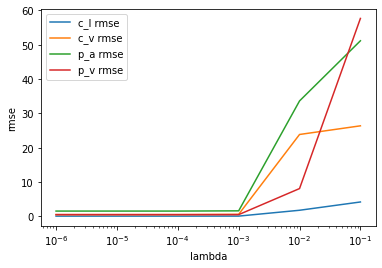

array([[3.31857727e-02, 4.71053715e-01, 1.50184109e+00, 4.71215762e-01],
       [3.31592005e-02, 4.71096265e-01, 1.50187118e+00, 4.71072600e-01],
       [3.31592468e-02, 4.73226133e-01, 1.50025695e+00, 4.70254681e-01],
       [3.76799541e-02, 5.51957081e-01, 1.56952640e+00, 4.63144781e-01],
       [1.73931012e+00, 2.38147540e+01, 3.35856567e+01, 8.05803374e+00],
       [4.15242974e+00, 2.63371146e+01, 5.11118331e+01, 5.76187333e+01]])

In [201]:
get_best_lambda()

In [142]:
#get_best_sigma([2.91474342, 5.7457597,  1.5,8.68180467])

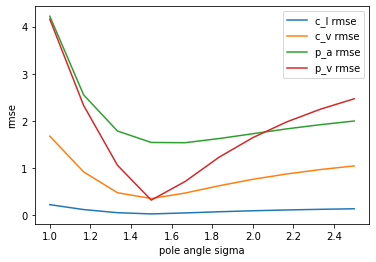

In [143]:
final_rmse = np.array([[0.22754027, 1.67844111, 4.21803487, 4.15569655],
       [0.1238923 , 0.9219978 , 2.55326758, 2.32936737],
       [0.05750535, 0.48109119, 1.7875829 , 1.06324303],
       [0.03154466, 0.35700744, 1.54494325, 0.32396795],
       [0.05218638, 0.47354056, 1.53969897, 0.71762089],
       [0.07717969, 0.62675214, 1.62690369, 1.2299503 ],
       [0.09824417, 0.76395276, 1.72941303, 1.64547653],
       [0.11528881, 0.87725416, 1.83221559, 1.97845752],
       [0.12908586, 0.97102536, 1.92129317, 2.2488915 ],
       [0.14037602, 1.04799608, 1.99906014, 2.46978604]])
x_axis= np.linspace(1,2.5,10)
plt.plot(x_axis,[y[0] for y in final_rmse],label = 'c_l rmse')
plt.plot(x_axis,[y[1] for y in final_rmse],label = 'c_v rmse')
plt.plot(x_axis,[y[2] for y in final_rmse],label = 'p_a rmse')
plt.plot(x_axis,[y[3] for y in final_rmse],label = 'p_v rmse')
plt.xlabel('pole angle sigma')
plt.ylabel('rmse')
plt.legend()
plt.show()


array([0.02913481, 0.49266017, 1.54575273, 0.44840806])

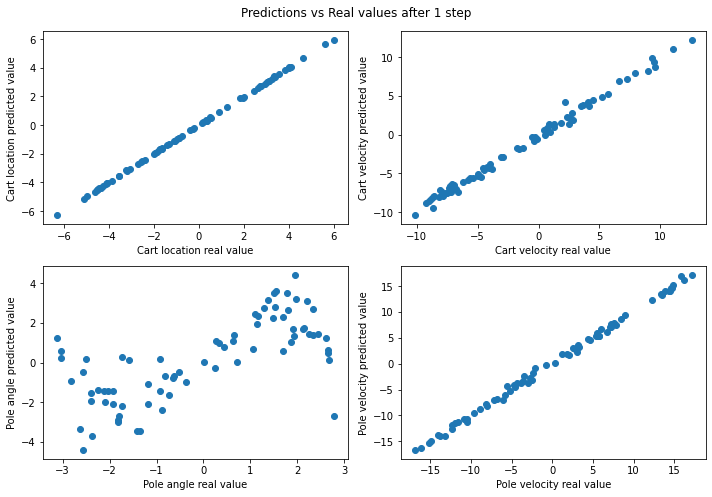

In [144]:
real_vs_predicted(test_y+test_x,non_lin_prediction(train_x,train_y,test_x,320,sigma)+test_x)
rmse_calc(test_y,non_lin_prediction(train_x,train_y,test_x,320,sigma))

In [145]:
vertical_plot(test_x,test_y+test_x,non_lin_prediction(train_x,train_y,test_x,320,sigma)+test_x)
rmse_calc(test_y,non_lin_prediction(train_x,train_y,test_x,320,sigma))

TypeError: non_lin_prediction() missing 1 required positional argument: 'sigma'

In [65]:
def m_convergence(m_range,train_x,train_y,test_x,test_y):
    for m in m_range:
        print('For m={}, the rmse is {}'.format(m,rmse_calc(test_y,non_lin_prediction(train_x,train_y,test_x,m))))

In [147]:
def m_convergence2(m_range,train_x,train_y,test_x,test_y,sigma):
    final=[]
    for count,m in enumerate(m_range):
        final.append( rmse_calc(test_y,non_lin_prediction(train_x,train_y,test_x,m,sigma)))
    return np.array(final)

In [148]:
m_convergence2([10,20,40,80,160,320],train_x,train_y,test_x,test_y,sigma)

array([[0.5411789 , 1.40936774, 2.33035721, 4.05226626],
       [0.36862548, 1.37287474, 2.30455165, 3.68527198],
       [0.19614838, 0.95300749, 2.04117742, 2.11241214],
       [0.11442676, 0.69503741, 1.4865145 , 1.15560014],
       [0.06563408, 0.51947537, 1.54763963, 0.63864144],
       [0.02918828, 0.49485922, 1.54902089, 0.4470695 ]])

In [149]:

n500 = np.array([[0.62860211, 1.86926565, 2.63677828, 4.50260286],
       [0.54262123, 1.52808316, 2.59075904, 3.03920808],
       [0.40288858, 1.51242185, 2.82968947, 2.46112331],
       [0.24871751, 1.11024055, 2.25127096, 1.28168726],
       [0.13121874, 0.7635774 , 1.95268798, 0.59640671],
       [0.1053151 , 1.08156465, 2.83903408, 0.5746922 ]])

n1000 = np.array([[0.52498452, 1.61987768, 2.73615459, 4.41394231],
       [0.37674347, 1.45704647, 2.5980995 , 3.90292121],
       [0.22142249, 1.45328528, 2.42606291, 3.18697276],
       [0.12477577, 0.98579674, 2.04329912, 1.92692329],
       [0.07085554, 0.64734572, 1.83265546, 0.66537208],
       [0.03566799, 0.46355428, 2.02597565, 0.47670923],])

n1500 =np.array([[0.55046928, 1.37067314, 2.60991324, 3.7622772 ],
       [0.46494191, 1.35129414, 2.53911607, 3.29960088],
       [0.20897723, 1.06651506, 2.28597247, 2.30656343],
       [0.12375119, 0.68501498, 2.07322874, 1.2048078 ],
       [0.04886329, 0.5190043 , 1.72682086, 0.54650417],
       [0.02777602, 0.43528952, 1.5764024 , 0.37822372]])
n2000 = np.array([[0.54646174, 1.35712965, 2.79301571, 3.82850108],
       [0.33356236, 1.27247908, 2.56005674, 3.36805193],
       [0.21710822, 1.00574302, 2.13188054, 2.43446364],
       [0.13393126, 0.74471585, 1.9326018 , 1.12564958],
       [0.06531082, 0.57606085, 1.69791708, 0.52295928],
       [0.02423695, 0.39145814, 1.57555632, 0.40086225]])
n1500_new =np.array([[0.5411789 , 1.40936774, 2.33035721, 4.05226626],
       [0.36862548, 1.37287474, 2.30455165, 3.68527198],
       [0.19614838, 0.95300749, 2.04117742, 2.11241214],
       [0.11442676, 0.69503741, 1.4865145 , 1.15560014],
       [0.06563408, 0.51947537, 1.54763963, 0.63864144],
       [0.02918828, 0.49485922, 1.54902089, 0.4470695 ]])

In [150]:
def plot_2_convergence(mat1,mat2):
    x_axis = [10,20,40,80,160,320]

    fig, axs = plt.subplots(2, 2, figsize=(17, 11))

    
    axs[0,0].plot(x_axis,[y[0] for y in mat1],label = 'original p_a sigma')
    axs[0,0].plot(x_axis,[y[0] for y in mat2],label = 'p_a sigma = 1.5')

    axs[0,0].legend()

    axs[1,0].plot(x_axis,[y[1] for y in mat1],label = 'original p_a sigma')
    axs[1,0].plot(x_axis,[y[1] for y in mat2],label = 'p_a sigma = 1.5')

    axs[0,1].plot(x_axis,[y[2] for y in mat1],label = 'original p_a sigma')
    axs[0,1].plot(x_axis,[y[2] for y in mat2],label = 'p_a sigma = 1.5')

    axs[1,1].plot(x_axis,[y[3] for y in mat1],label = 'original p_a sigma')
    axs[1,1].plot(x_axis,[y[3] for y in mat2],label = 'p_a sigma = 1.5')
    #lable
    axs[0,0].set_xlabel('number of basis vectors')
    axs[0,0].set_ylabel('Cart location RMSE')

    axs[0,1].set_xlabel('number of basis vectors')
    axs[0,1].set_ylabel('Cart velocity RMSE')

    axs[1,0].set_xlabel('number of basis vectors')
    axs[1,0].set_ylabel('Pole angle RMSE')

    axs[1,1].set_xlabel('number of basis vectors')
    axs[1,1].set_ylabel('Pole velocity RMSE')

    fig.tight_layout()

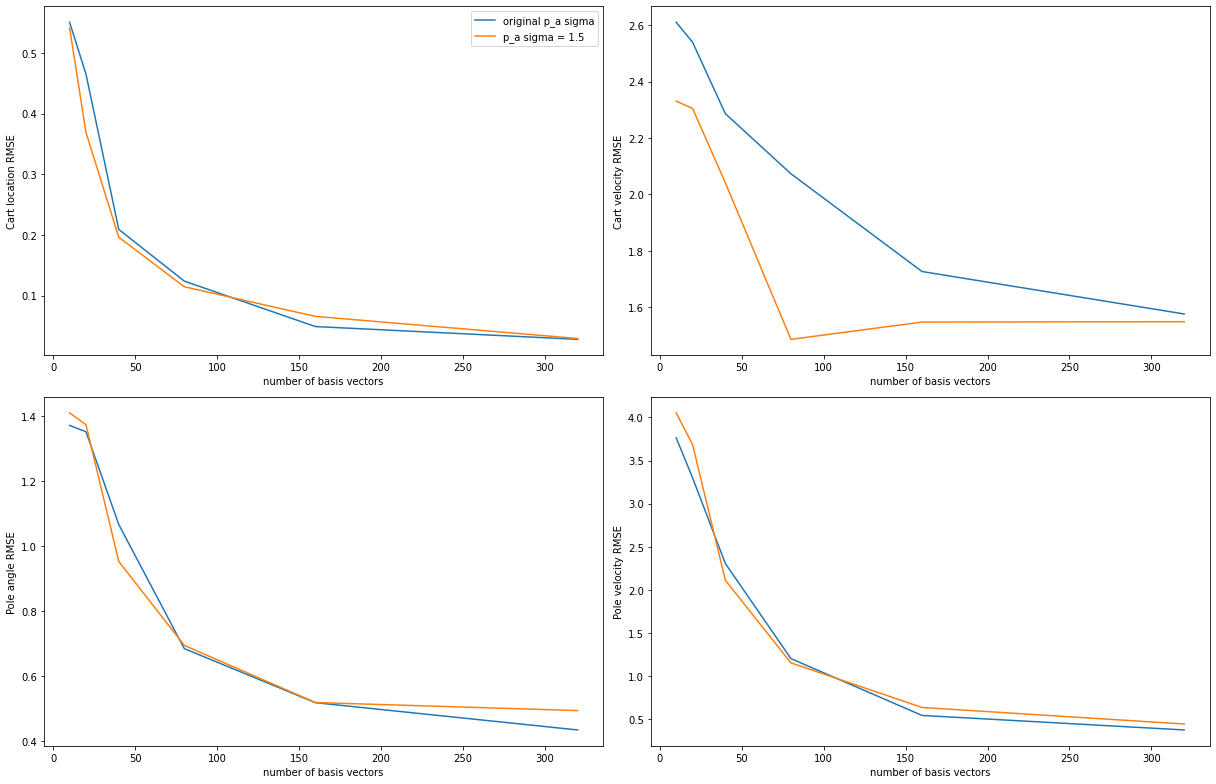

In [151]:
plot_2_convergence(n1500,n1500_new)

In [85]:
def plot_nm_convergence(n500,n1000,n1500,n2000):
    x_axis = [10,20,40,80,160,320]

    fig, axs = plt.subplots(2, 2, figsize=(17, 11))

    
    axs[0,0].plot(x_axis,[y[0] for y in n500],label = 'n=500')
    axs[0,0].plot(x_axis,[y[0] for y in n1000],label = 'n=1000')
    axs[0,0].plot(x_axis,[y[0] for y in n1500],label = 'n=1500')
    axs[0,0].plot(x_axis,[y[0] for y in n2000],label = 'n=2000')
    axs[0,0].legend()

    axs[0,1].plot(x_axis,[y[1] for y in n500],label = 'n=500')
    axs[0,1].plot(x_axis,[y[1] for y in n1000],label = 'n=1000')
    axs[0,1].plot(x_axis,[y[1] for y in n1500],label = 'n=1500')
    axs[0,1].plot(x_axis,[y[1] for y in n2000],label = 'n=2000')

    axs[1,0].plot(x_axis,[y[2] for y in n500],label = 'n=500')
    axs[1,0].plot(x_axis,[y[2] for y in n1000],label = 'n=1000')
    axs[1,0].plot(x_axis,[y[2] for y in n1500],label = 'n=1500')
    axs[1,0].plot(x_axis,[y[2] for y in n2000],label = 'n=2000')

    axs[1,1].plot(x_axis,[y[3] for y in n500],label = 'n=500')
    axs[1,1].plot(x_axis,[y[3] for y in n1000],label = 'n=1000')
    axs[1,1].plot(x_axis,[y[3] for y in n1500],label = 'n=1500')
    axs[1,1].plot(x_axis,[y[3] for y in n2000],label = 'n=2000')

    #lables
    axs[0,0].set_xlabel('number of basis vectors')
    axs[0,0].set_ylabel('Cart location RMSE')

    axs[0,1].set_xlabel('number of basis vectors')
    axs[0,1].set_ylabel('Cart velocity RMSE')

    axs[1,0].set_xlabel('number of basis vectors')
    axs[1,0].set_ylabel('Pole angle RMSE')

    axs[1,1].set_xlabel('number of basis vectors')
    axs[1,1].set_ylabel('Pole velocity RMSE')

    fig.tight_layout()


(6, 4)


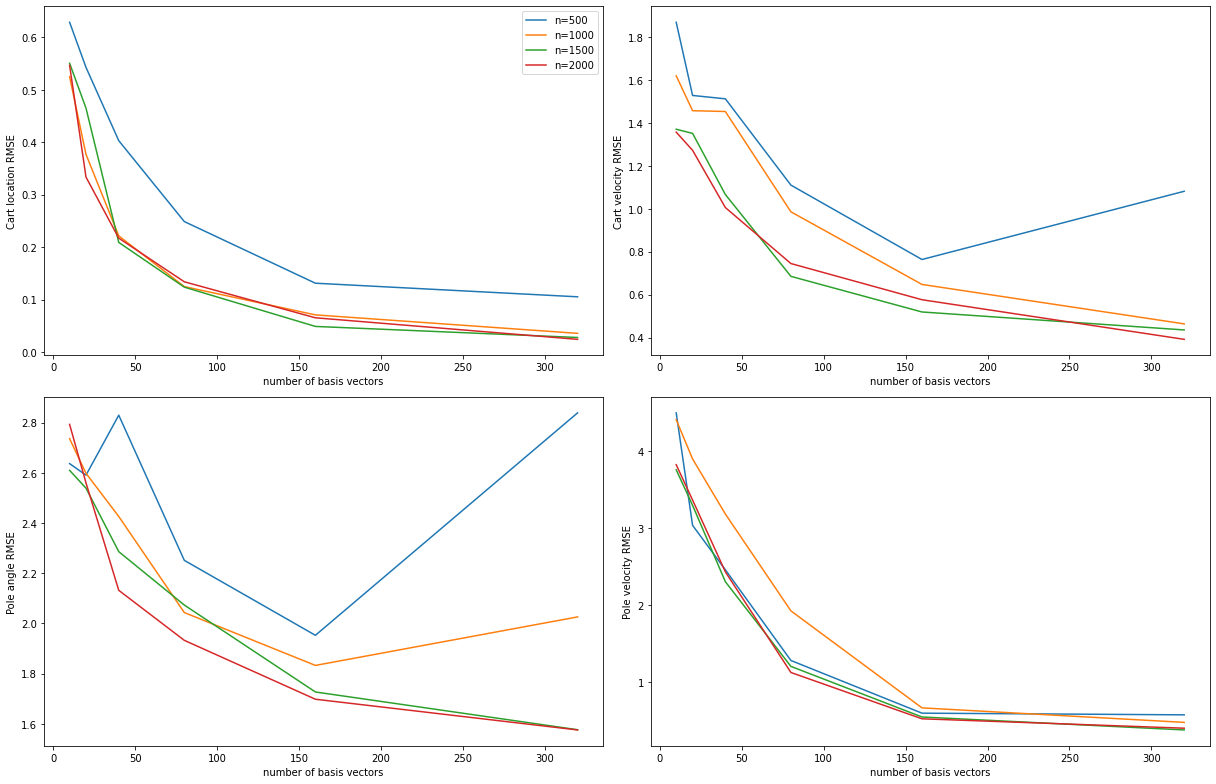

In [86]:
plot_nm_convergence(n500,n1000,n1500,n2000)

## Task 2.1

In [204]:

def non_linear_one_step_difference_with_predictions(variable, x_axis_range, x_axis_intervals,m,sigma,lambd):
    initial = [-0.24,-9.27,-1.07,9.09]
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    pred = np.zeros((4))
    for i in x_axis:
        initial[variable] = i
        x_t = start_the_cart(initial, steps=steps, display_plots=False,remap_angle=True)
        real = x_t-initial
        pred = non_linear_model(initial,train_x,train_y,lambd,m,sigma)
        try: 
            final_y = np.vstack((final_y, np.array(real)))
            final_pred = np.vstack((final_pred,np.array(pred)))
        except:
            final_y = np.array(real)
            final_pred = np.array(pred)



    return x_axis,final_y,final_pred

In [206]:
x_axis1, c_l_real,c_l_pred = non_linear_one_step_difference_with_predictions(0,[-5,5],15,10,sigma,0.1)
print(c_l_pred.shape)

(15, 4)


In [207]:
def non_linear_together_plot(m,lambd):
    x_axis1, c_l_real,c_l_pred = non_linear_one_step_difference_with_predictions(0,[-5,5],15,m,sigma,lambd)
    x_axis2,c_v_real,c_v_pred = non_linear_one_step_difference_with_predictions(1,[-10,10],15,m,sigma,lambd)
    x_axis3,p_a_real,p_a_pred = non_linear_one_step_difference_with_predictions(2,[-np.pi,np.pi],15,m,sigma,lambd)
    x_axis4,p_v_real,p_v_pred = non_linear_one_step_difference_with_predictions(3,[-15,15],15,m,sigma,lambd)

    fig, axs = plt.subplots(2, 2, figsize=(17, 11))
    color = {0:'blue',1:'orange',2:'green',3:'red'}
    for i in range(4):
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_real],label='Real {}'.format(variable_number[i]))
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_pred],color=color[i],linestyle='dashed',label='Predicted {}'.format(variable_number[i]))
        
        
        
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_real],label='Real c_v')
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_pred],label='Predicted c_v',linestyle='dashed',color=color[i])

        axs[1,0].plot(x_axis3, [y[i] for y in p_a_real],label='Real p_a')
        axs[1,0].plot(x_axis3, [y[i] for y in p_a_pred],label='Predicted p_a',linestyle='dashed',color=color[i])
        
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_real],label='Real p_v')
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_pred],label='Predicted p_v',linestyle='dashed',color=color[i])

        
        axs[0,0].legend()


    axs[0,0].set_xlabel('Initial value of cart location')
    axs[0,0].set_ylabel('Cart dynamics changes')

    axs[0,1].set_xlabel('Initial value of cart velocity')
    axs[0,1].set_ylabel('Cart dynamics changes')

    axs[1,0].set_xlabel('Initial value of pole angle')
    axs[1,0].set_ylabel('Cart dynamics changes')

    axs[1,1].set_xlabel('Initial value of pole velocity')
    axs[1,1].set_ylabel('Cart dynamics changes')

    fig.tight_layout()
    
        
    plt.show()

In [172]:
print (initialize)

[ 4.15012647 -0.18362984 -2.04844545 11.54905388]


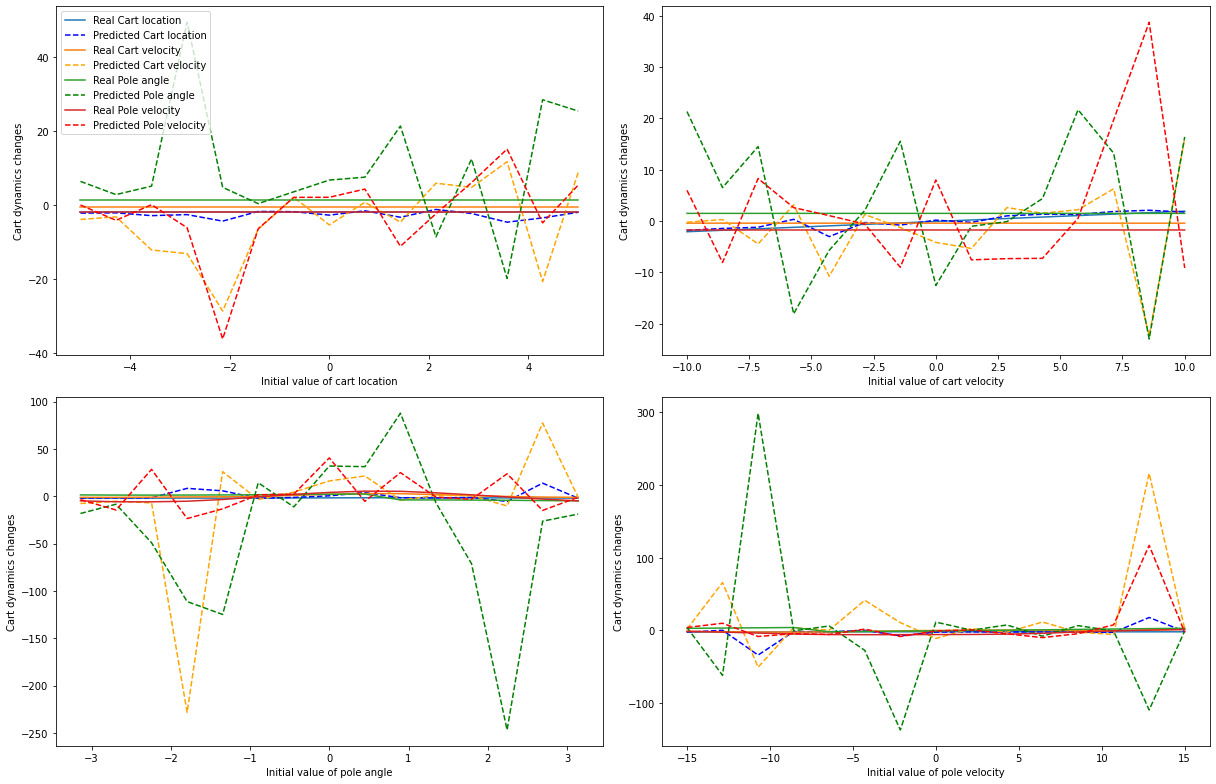

In [208]:
non_linear_together_plot(320,0.1)

In [209]:
def non_linear_future_predictions_from_predictions(initial_conditions, time_steps,m,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = non_linear_model(final_pred[i],train_x,train_y,0.00001,m,sigma)
        pred+=final_pred[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from predictions) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

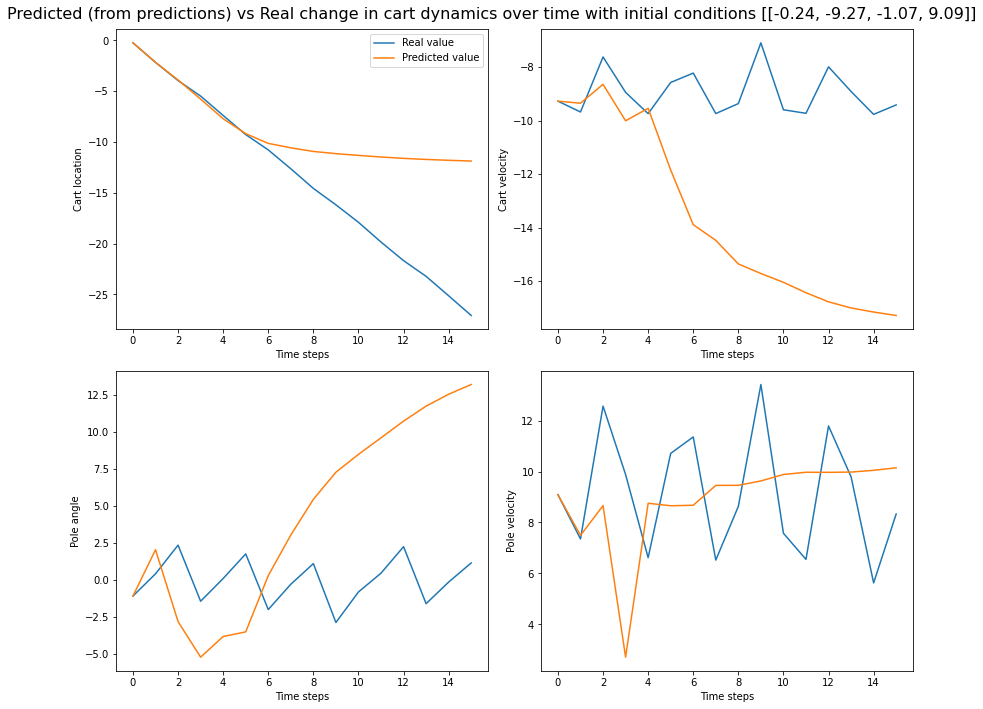

In [211]:
non_linear_future_predictions_from_predictions([[-0.24,-9.27,-1.07,9.09]], 15,320,remap_angle=True)

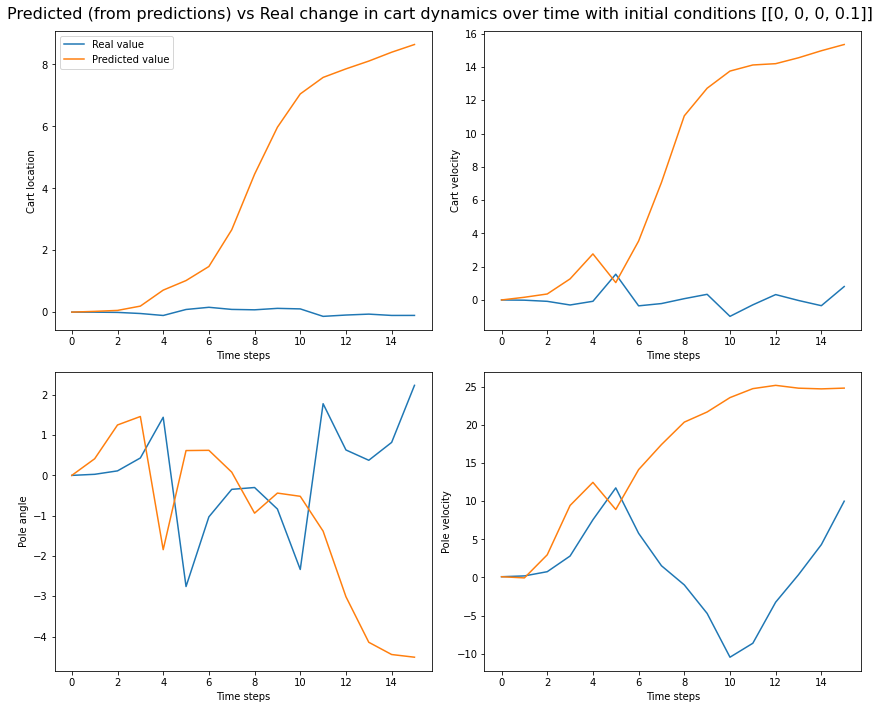

In [212]:
non_linear_future_predictions_from_predictions([[0,0,0,0.1]], 15,320,remap_angle=True)

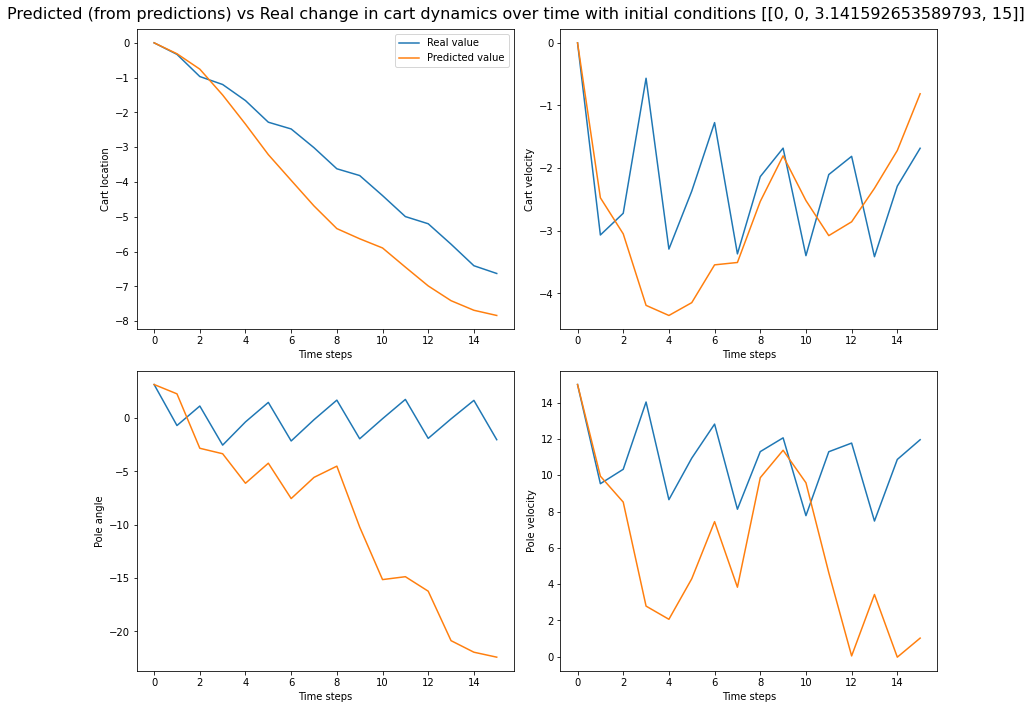

In [213]:
non_linear_future_predictions_from_predictions([[0,0,np.pi,15]], 15,320,remap_angle=True)

In [214]:
def non_linear_future_predictions_from_real(initial_conditions, time_steps,m,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = non_linear_model(final_y[i],train_x,train_y,0.00001,m,sigma)
        pred+=final_y[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from recent dynamics) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

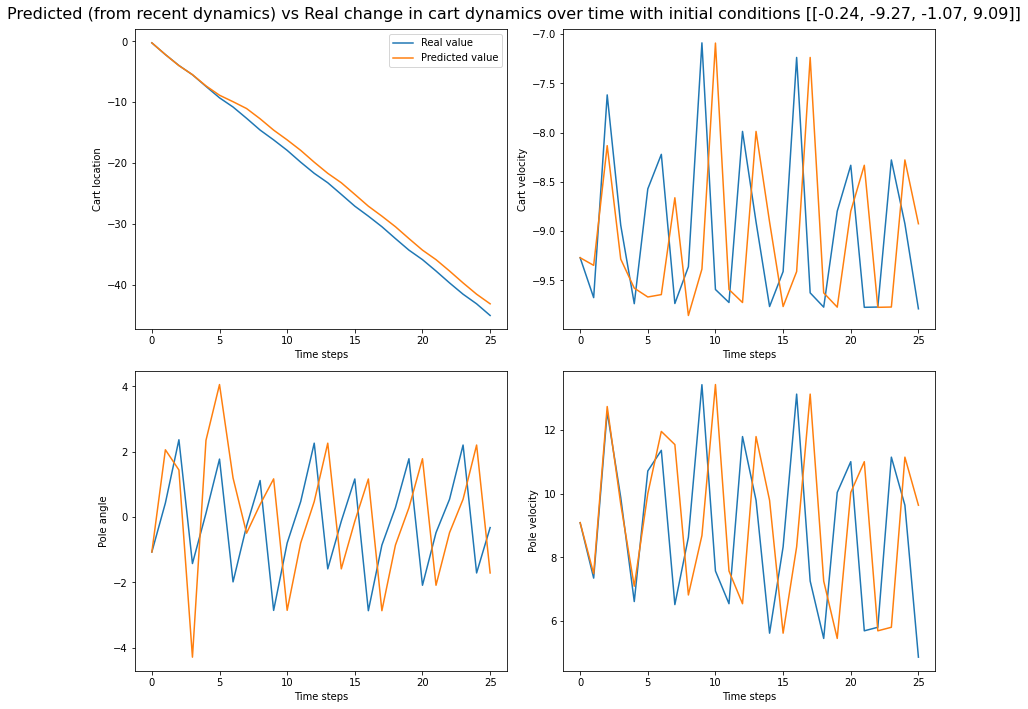

In [220]:
non_linear_future_predictions_from_real([[-0.24,-9.27,-1.07,9.09]], 25,320,remap_angle=True)

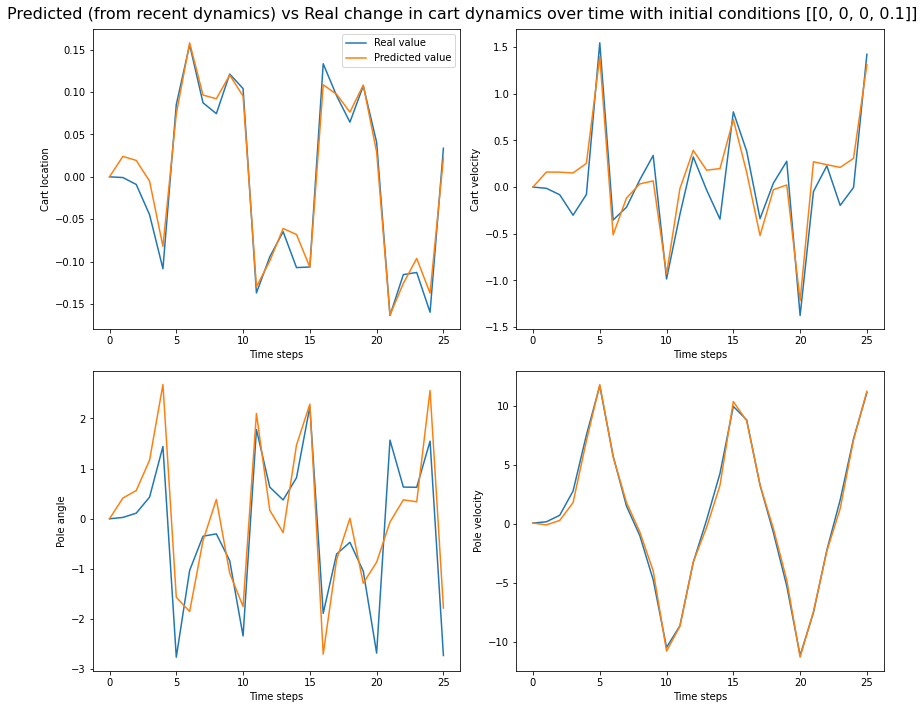

In [222]:
non_linear_future_predictions_from_real([[0,0,0,0.1]], 25,320,remap_angle=True)

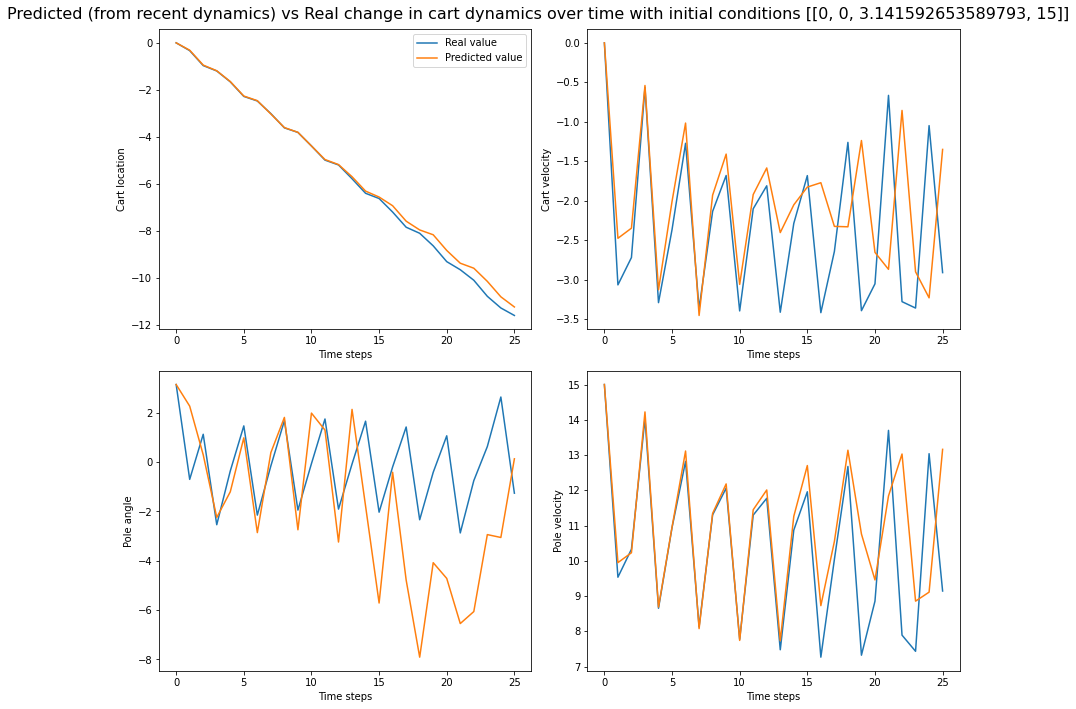

In [224]:
non_linear_future_predictions_from_real([[0,0,np.pi,15]], 25,320,remap_angle=True)

In [225]:
stop

NameError: name 'stop' is not defined

In [218]:
"""
different_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
axes_ranges = {0 : np.linspace(-5,5,10), 1 : np.linspace(-10,10,10), 2 : np.linspace(-np.pi,np.pi,10), 3 : np.linspace(-15,15,10)}

def axes_for_pairs(index_pair):
    range_of_variables = []
    for index in index_pair:
        range_of_variables.append(axes_ranges[index])
    return range_of_variables
"""
def non_linear_contours_of_pairs(index_pair, range_of_variables):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_of_variables
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = [-0.24,-9.27,-1.07,9.09]
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(non_linear_model(x,train_x,train_y,0.00001,320,sigma))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

Plots of Cart location and Cart velocity


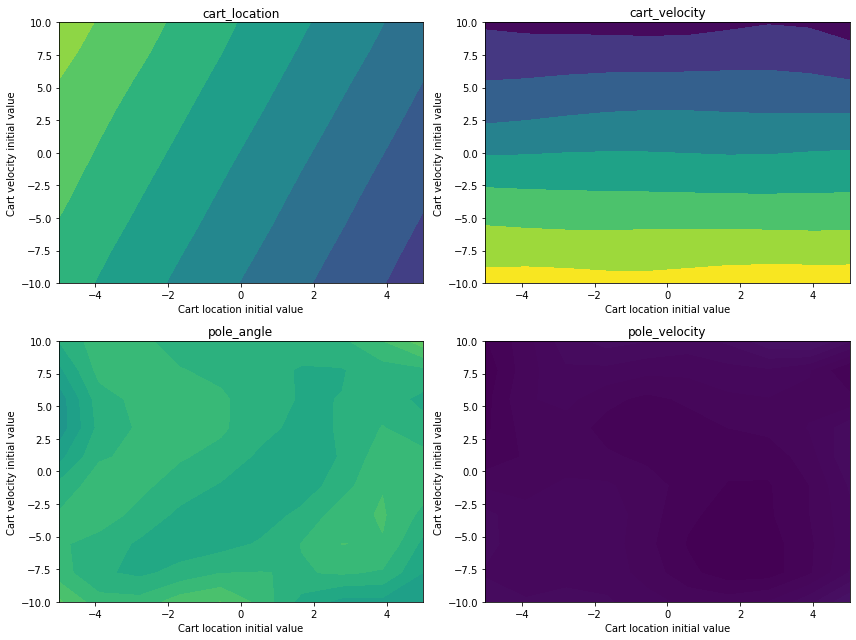

Plots of Cart location and Pole angle


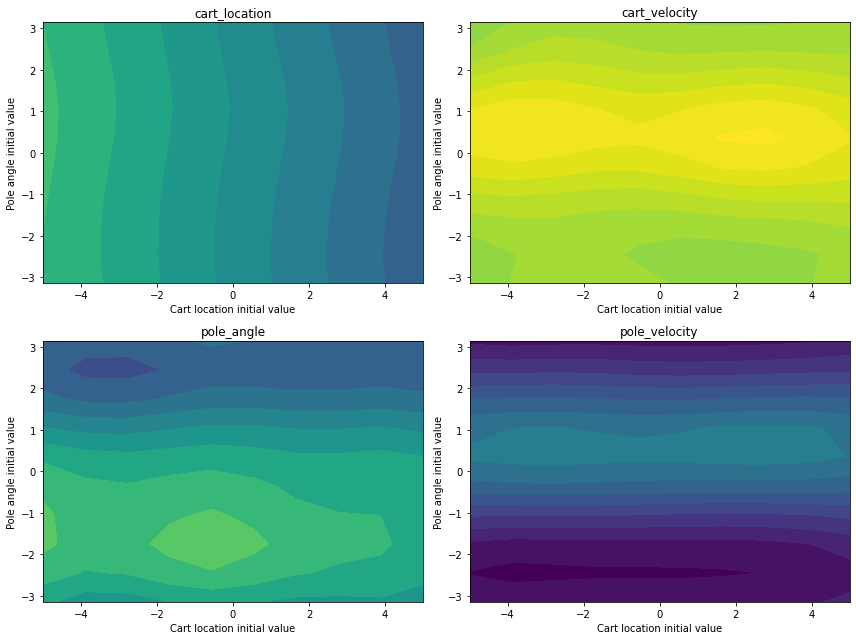

Plots of Cart location and Pole velocity


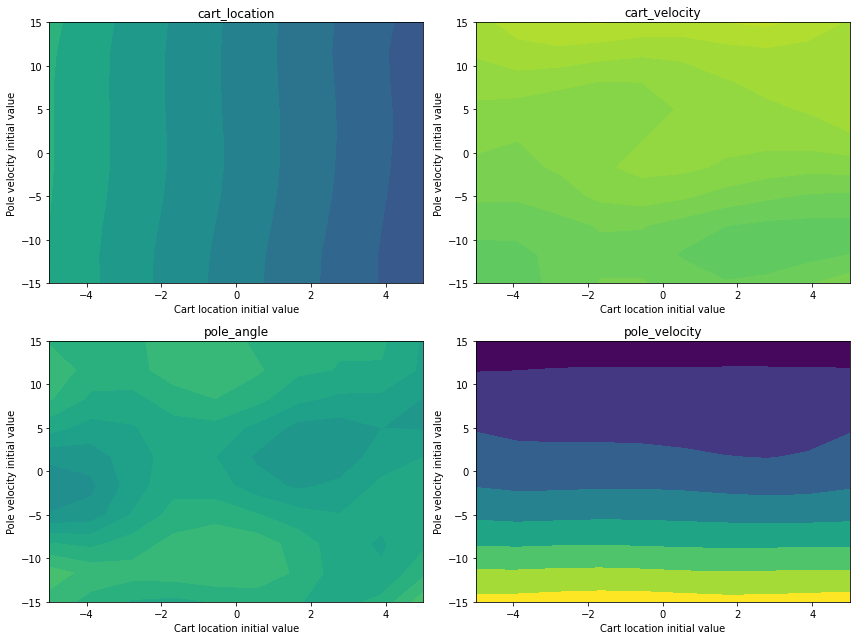

Plots of Cart velocity and Pole angle


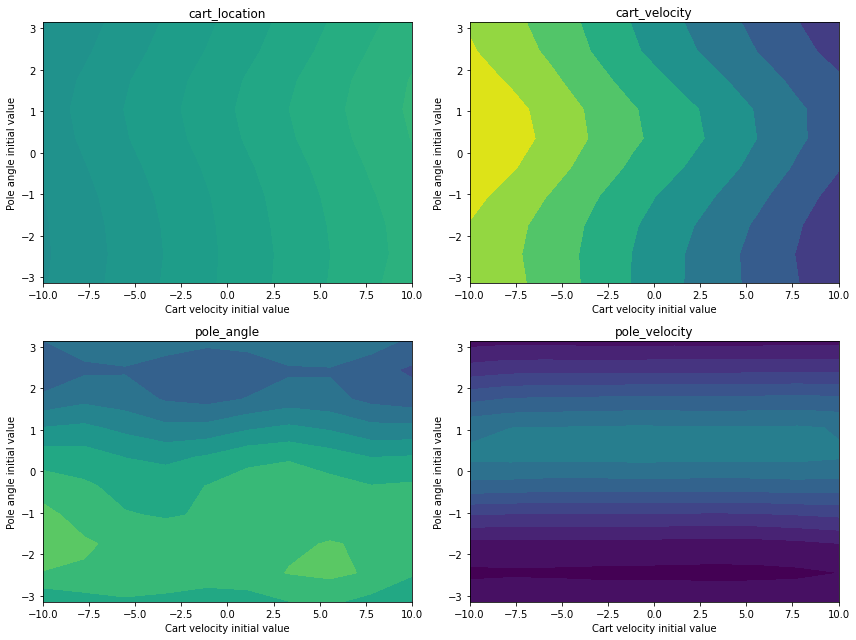

Plots of Cart velocity and Pole velocity


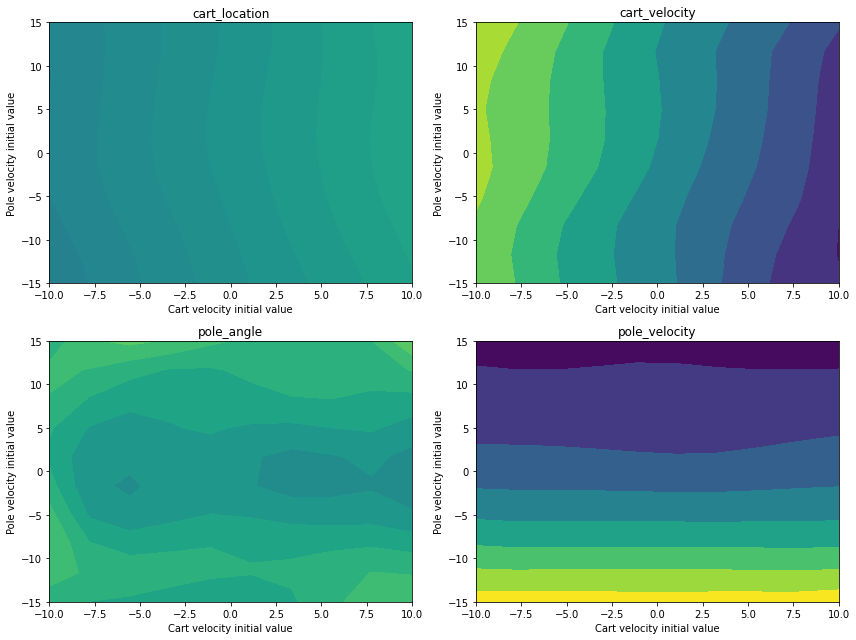

Plots of Pole angle and Pole velocity


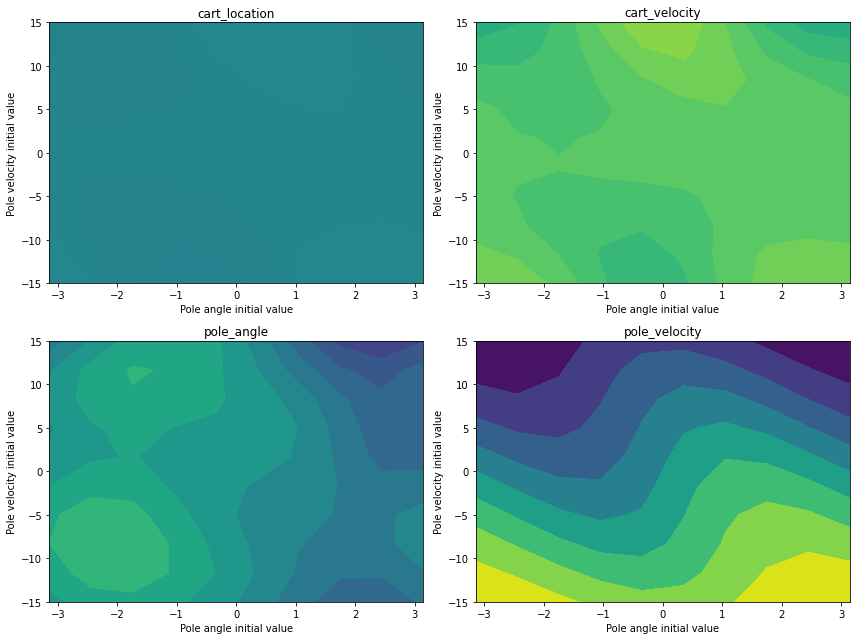

In [219]:

for indices in different_pairs:
     print('Plots of {} and {}'.format(variable_number[indices[0]],variable_number[indices[1]]))
     non_linear_contours_of_pairs(indices, axes_for_pairs(indices))
     plt.show()  


In [221]:
def contours_of_pairs2(index_pair, range_of_variables):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_of_variables
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = [-0.24,-9.27,-1.07,9.09]
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(start_the_cart(x, steps=1, display_plots=False))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

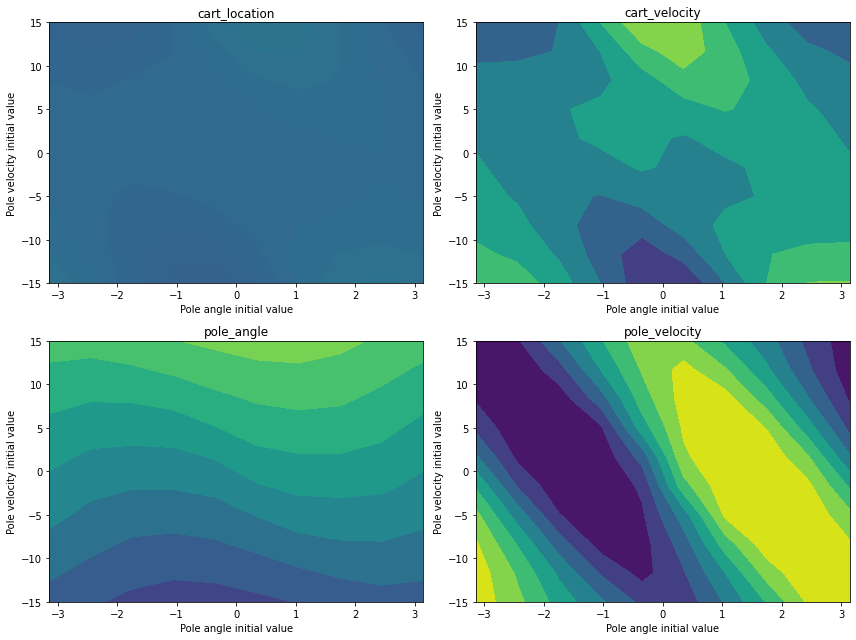

In [223]:
contours_of_pairs2([2,3], axes_for_pairs([2,3]))

## Task 2.2